In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_propotion/SharedResponsesSurvey_propotion.csv')
df.head()

,Review_political,Review_gender,AttributeLevel,Saved,ResponseID,UserID,Review_political_cat
0,0.83,female,Old,0,3P8hoWHnyQFR9HPmE,4.765992e+15,Right
1,0.83,female,Male,1,7sg56HdeSGCNAAyyk,4.765992e+15,Right
2,0.83,female,Old,0,9Dft5mnJPvhDzJw2D,4.765992e+15,Right
3,0.83,female,Pets,0,CjC5MXuXyWDkxzRrt,4.765992e+15,Right
4,0.83,female,Hoomans,1,TsdGhwMmAjej9xK5o,4.765992e+15,Right


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming 'df' is your DataFrame, and it has been appropriately loaded and prepared.
df['is_save'] = df['Saved'] == 1

ordered_political_labels = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

# Define the pairs of attributes you want to compare
attribute_pairs = [
    ('Fit', 'Fat'),
    ('Female', 'Male'),
    ('Young', 'Old'),
    ('Hoomans', 'Pets'),
    ('High', 'Low')
    ('More', 'Less')
]

# Initialize an empty DataFrame for accumulating results
all_diffs_df = pd.DataFrame()

# Bootstrap parameters
n_bootstraps = 100  # Adjust as necessary for balance between speed and accuracy
np.random.seed(42)  # For reproducibility

# Loop through each pair
for pair in attribute_pairs:
    diffs = []  # List to store the differences in proportions for each bootstrap
    for i in range(n_bootstraps):
        # Sample with replacement
        sampled_df = df.sample(n=len(df), replace=True)
        # Calculate mean proportion of save for each level within the pair
        proportions = sampled_df.groupby(['AttributeLevel', 'Review_political_cat'])['is_save'].mean().reset_index()
        # Calculate differences
        diff = proportions[proportions['AttributeLevel'] == pair[0]].set_index('Review_political_cat')['is_save'] - \
               proportions[proportions['AttributeLevel'] == pair[1]].set_index('Review_political_cat')['is_save']
        diffs.append(diff)
    # Store the differences in a DataFrame
    diffs_df = pd.DataFrame(diffs)

    # save the results to a csv file where each column is a political label and the column is all the bootstrap samples
    diffs_df.to_csv(f'bootstrap/{pair[0]}_{pair[1]}_diffs.csv')
    
    

    
    

In [9]:
df['is_save'] = df['Saved'] == 1

ordered_political_labels = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

# Define the pairs of attributes you want to compare
attribute_pairs = [
    ('More', 'Less'),
]

# Initialize an empty DataFrame for accumulating results
all_diffs_df = pd.DataFrame()

# Bootstrap parameters
n_bootstraps = 100  # Adjust as necessary for balance between speed and accuracy
np.random.seed(42)  # For reproducibility

# Loop through each pair
for pair in attribute_pairs:
    diffs = []  # List to store the differences in proportions for each bootstrap
    for i in range(n_bootstraps):
        # Sample with replacement
        sampled_df = df.sample(n=len(df), replace=True)
        # Calculate mean proportion of save for each level within the pair
        proportions = sampled_df.groupby(['AttributeLevel', 'Review_political_cat'])['is_save'].mean().reset_index()
        # Calculate differences
        diff = proportions[proportions['AttributeLevel'] == pair[0]].set_index('Review_political_cat')['is_save'] - \
               proportions[proportions['AttributeLevel'] == pair[1]].set_index('Review_political_cat')['is_save']
        diffs.append(diff)
    # Store the differences in a DataFrame
    diffs_df = pd.DataFrame(diffs)

    # save the results to a csv file where each column is a political label and the column is all the bootstrap samples
    diffs_df.to_csv(f'bootstrap/{pair[0]}_{pair[1]}_diffs.csv')
    
    


In [5]:
# draw the boxplot
import pandas as pd
from scipy.stats import wilcoxon, ttest_rel

attribute_pairs = [
    ('Fit', 'Fat'),
    ('Female', 'Male'),
    ('Young', 'Old'),
    ('Hoomans', 'Pets'),
    ('High', 'Low'),
    ('More', 'Less')
]


for pair in attribute_pairs:
    print(f"Comparing {pair[0]} vs {pair[1]}")
    diffs_df = pd.read_csv(f'bootstrap/{pair[0]}_{pair[1]}_diffs.csv', index_col=0)
    # remove the first column
    diffs_df = diffs_df.apply(pd.to_numeric, errors='coerce')
    labels = diffs_df.columns
    for i in range(len(labels) - 1):
        j = i + 1
        stat, p = ttest_rel(diffs_df[labels[i]], diffs_df[labels[j]])
        print(f"Comparing {labels[i]} vs {labels[j]}: p-value = {p:.4f}")

Comparing Fit vs Fat
Comparing Center vs Left: p-value = 0.0000
Comparing Left vs Left Center: p-value = 0.0000
Comparing Left Center vs Right: p-value = 0.0000
Comparing Right vs Right Center: p-value = 0.0000
Comparing Female vs Male
Comparing Center vs Left: p-value = 0.0000
Comparing Left vs Left Center: p-value = 0.0000
Comparing Left Center vs Right: p-value = 0.0000
Comparing Right vs Right Center: p-value = 0.0000
Comparing Young vs Old
Comparing Center vs Left: p-value = 0.0000
Comparing Left vs Left Center: p-value = 0.0000
Comparing Left Center vs Right: p-value = 0.0000
Comparing Right vs Right Center: p-value = 0.0000
Comparing Hoomans vs Pets
Comparing Center vs Left: p-value = 0.0000
Comparing Left vs Left Center: p-value = 0.0000
Comparing Left Center vs Right: p-value = 0.0000
Comparing Right vs Right Center: p-value = 0.0000
Comparing High vs Low
Comparing Center vs Left: p-value = 0.0000
Comparing Left vs Left Center: p-value = 0.0000
Comparing Left Center vs Right: 

In [6]:
from scipy.stats import f_oneway

for pair in attribute_pairs:
    print(f"\nComparing {pair[0]} vs {pair[1]}")
    diffs_df = pd.read_csv(f'bootstrap/{pair[0]}_{pair[1]}_diffs.csv', index_col=0)
    
    diffs_df = diffs_df.apply(pd.to_numeric, errors='coerce')

    # Prepare data for ANOVA
    # Since ANOVA in scipy takes separate arrays for each group, we need to unpack the DataFrame columns
    # Assuming each column in diffs_df is a different group
    groups = [diffs_df[label].dropna() for label in diffs_df.columns]

    # Perform one-way ANOVA
    f_statistic, p_value = f_oneway(*groups)
    print(f"F-statistic: {f_statistic}, P-value: {p_value}")

    # Interpret the result
    if p_value < 0.05:
        print("There is a significant difference among the groups.")
    else:
        print("There is no significant difference among the groups.")


Comparing Fit vs Fat
F-statistic: 1707.3815469379463, P-value: 5.583617177716524e-288
There is a significant difference among the groups.

Comparing Female vs Male
F-statistic: 10742.416443872804, P-value: 0.0
There is a significant difference among the groups.

Comparing Young vs Old
F-statistic: 1971.5591779117185, P-value: 1.8408912083115233e-302
There is a significant difference among the groups.

Comparing Hoomans vs Pets
F-statistic: 22149.748438923372, P-value: 0.0
There is a significant difference among the groups.

Comparing High vs Low
F-statistic: 3442.6463470029585, P-value: 0.0
There is a significant difference among the groups.

Comparing More vs Less
F-statistic: 9833.741678708508, P-value: 0.0
There is a significant difference among the groups.


In [7]:
from scipy.stats import linregress
import numpy as np

for pair in attribute_pairs:
    print(f"\nComparing {pair[0]} vs {pair[1]}")
    diffs_df = pd.read_csv(f'bootstrap/{pair[0]}_{pair[1]}_diffs.csv', index_col=0)
    diffs_df = diffs_df.apply(pd.to_numeric, errors='coerce')

    group_order = {'Left': 1, 'Left Center': 2, 'Center': 3, 'Right Center': 4, 'Right': 5}
    x = np.concatenate([[group_order[group]]*len(diffs_df[group]) for group in diffs_df.columns])
    y = np.concatenate([diffs_df[group].values for group in diffs_df.columns])

    # Fit a linear regression model
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate R^2
    r_squared = r_value**2

    # Print the results
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R-squared: {r_squared:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Significant linear trend across the groups.")
    else:
        print("No significant linear trend across the groups.")


Comparing Fit vs Fat
Slope: -0.0089
Intercept: 0.2141
R-squared: 0.8949
P-value: 0.0000
Significant linear trend across the groups.

Comparing Female vs Male
Slope: 0.0196
Intercept: 0.1074
R-squared: 0.9399
P-value: 0.0000
Significant linear trend across the groups.

Comparing Young vs Old
Slope: 0.0073
Intercept: 0.5293
R-squared: 0.7467
P-value: 0.0000
Significant linear trend across the groups.

Comparing Hoomans vs Pets
Slope: 0.0055
Intercept: 0.5709
R-squared: 0.0441
P-value: 0.0000
Significant linear trend across the groups.

Comparing High vs Low
Slope: -0.0200
Intercept: 0.4801
R-squared: 0.9316
P-value: 0.0000
Significant linear trend across the groups.

Comparing More vs Less
Slope: 0.0148
Intercept: 0.5442
R-squared: 0.8506
P-value: 0.0000
Significant linear trend across the groups.



Comparing Fit vs Fat


C:\Users\Ziqi\AppData\Local\Temp\ipykernel_12872\4256363205.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(x='variable', y='value', data=melted_diffs_df, order=order, ci="sd", palette='viridis', capsize=.2)


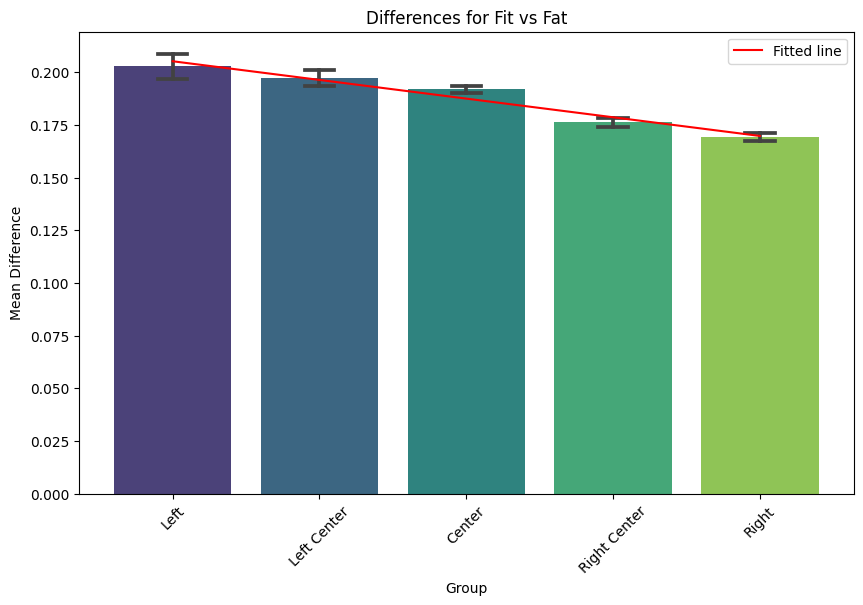


Comparing Female vs Male


C:\Users\Ziqi\AppData\Local\Temp\ipykernel_12872\4256363205.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(x='variable', y='value', data=melted_diffs_df, order=order, ci="sd", palette='viridis', capsize=.2)


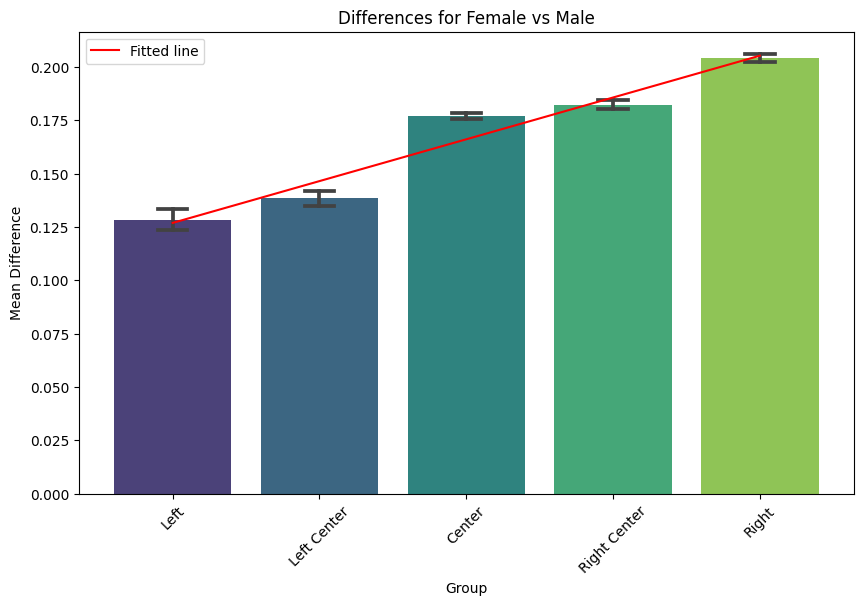


Comparing Young vs Old


C:\Users\Ziqi\AppData\Local\Temp\ipykernel_12872\4256363205.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(x='variable', y='value', data=melted_diffs_df, order=order, ci="sd", palette='viridis', capsize=.2)


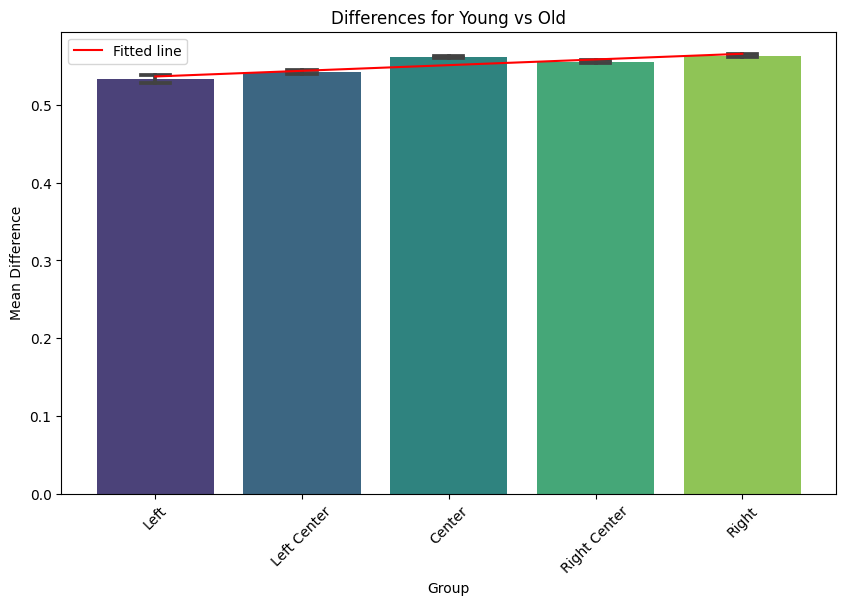


Comparing Hoomans vs Pets


C:\Users\Ziqi\AppData\Local\Temp\ipykernel_12872\4256363205.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(x='variable', y='value', data=melted_diffs_df, order=order, ci="sd", palette='viridis', capsize=.2)


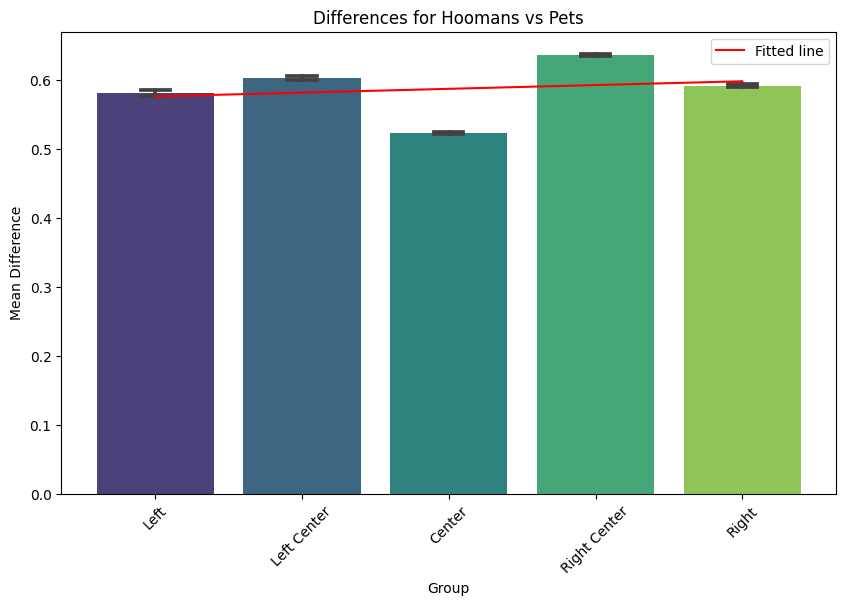


Comparing High vs Low


C:\Users\Ziqi\AppData\Local\Temp\ipykernel_12872\4256363205.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(x='variable', y='value', data=melted_diffs_df, order=order, ci="sd", palette='viridis', capsize=.2)


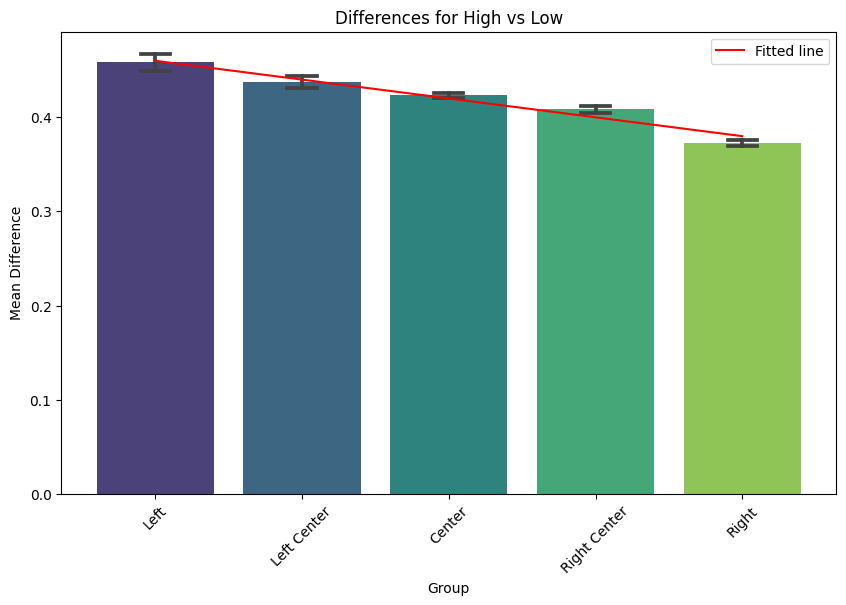


Comparing More vs Less


C:\Users\Ziqi\AppData\Local\Temp\ipykernel_12872\4256363205.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  barplot = sns.barplot(x='variable', y='value', data=melted_diffs_df, order=order, ci="sd", palette='viridis', capsize=.2)


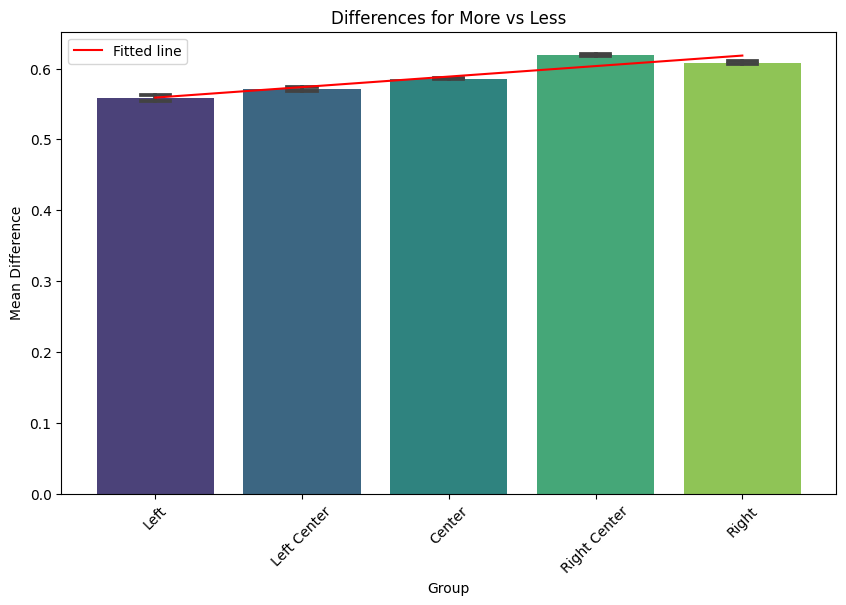

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

group_order = {'Left': 1, 'Left Center': 2, 'Center': 3, 'Right Center': 4, 'Right': 5}
order = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

for pair in attribute_pairs:
    print(f"\nComparing {pair[0]} vs {pair[1]}")
    diffs_df = pd.read_csv(f'bootstrap/{pair[0]}_{pair[1]}_diffs.csv', index_col=0)
    diffs_df = diffs_df.apply(pd.to_numeric, errors='coerce')  # Ensure data is numeric
    
    # Prepare data for plotting
    # Melt the DataFrame to long-form for seaborn plotting
    melted_diffs_df = diffs_df.reset_index().melt(id_vars='index').dropna()
    melted_diffs_df['group_order'] = melted_diffs_df['variable'].map({name: i for i, name in enumerate(order, start=1)})

    # Fit the linear regression model to the melted DataFrame
    slope, intercept, _, _, _ = linregress(melted_diffs_df['group_order'], melted_diffs_df['value'])

    # Calculate the fitted line's y-values
    x_vals = np.array(list(range(1, len(order) + 1)))
    y_vals = intercept + slope * x_vals

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x='variable', y='value', data=melted_diffs_df, order=order, ci="sd", palette='viridis', capsize=.2)
    
    # Overlay the fitted line
    plt.plot(order, y_vals, color="red", label="Fitted line")  # Match x-axis labels with 'order'

    plt.title(f"Differences for {pair[0]} vs {pair[1]}")
    plt.ylabel('Mean Difference')
    plt.xlabel('Group')
    plt.xticks(rotation=45)  # Optional: Rotate labels if they overlap
    plt.legend()

    plt.savefig(f'proportion_graph_final/{pair[0]}_{pair[1]}_diffs.png')
    

    # Show the plot
    plt.show()

C:\Users\Ziqi\AppData\Local\Temp\ipykernel_36204\1029866077.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=all_data_df, x='variable', y='value', hue='AttributePair', marker='o', palette='Set1', ci=None)


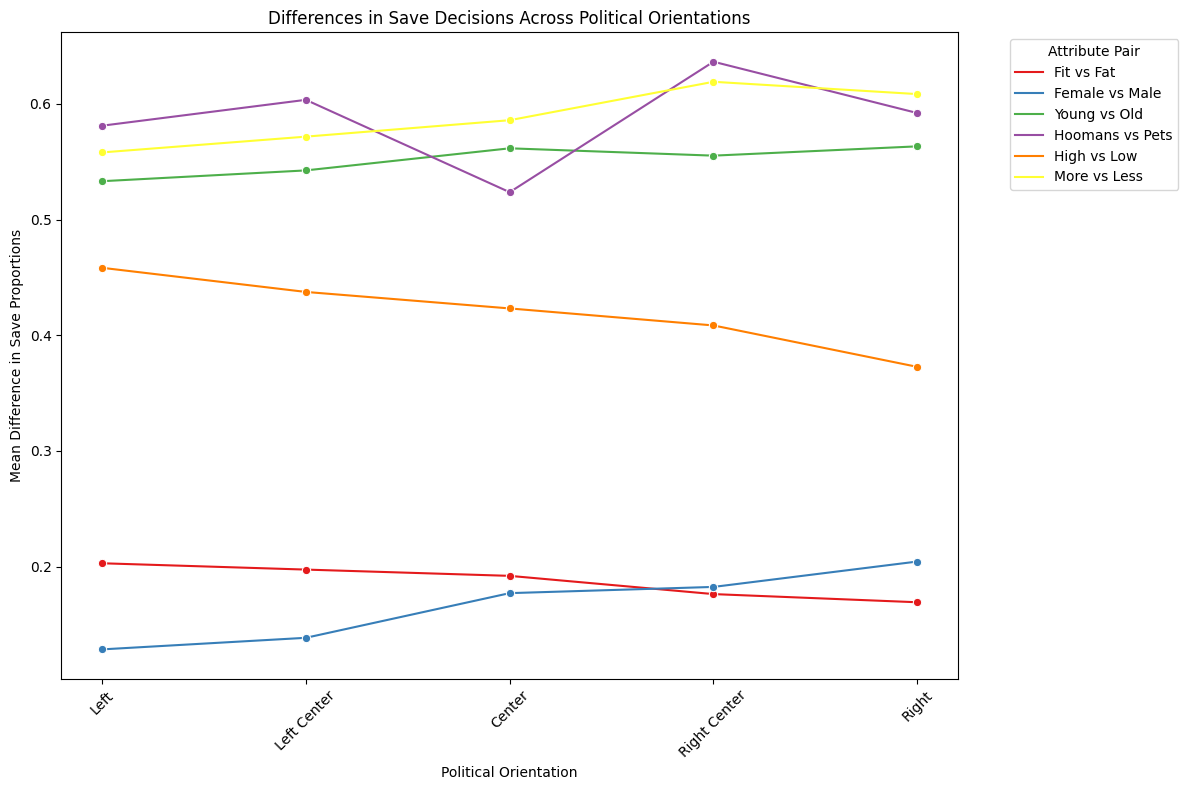

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'attribute_pairs' is defined and the required CSV files are in the specified directory

group_order = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']
attribute_pairs = [
    ('Fit', 'Fat'),
    ('Female', 'Male'),
    ('Young', 'Old'),
    ('Hoomans', 'Pets'),
    ('High', 'Low'),
    ('More', 'Less')
]
all_data = []

for pair in attribute_pairs:
    diffs_df = pd.read_csv(f'bootstrap/{pair[0]}_{pair[1]}_diffs.csv', index_col=0)
    diffs_df = diffs_df.apply(pd.to_numeric, errors='coerce')  # Ensure data is numeric
    
    # Prepare data for plotting, add attribute pair info
    melted_diffs_df = diffs_df.reset_index().melt(id_vars='index').dropna()
    melted_diffs_df['AttributePair'] = f"{pair[0]} vs {pair[1]}"
    all_data.append(melted_diffs_df)

# Concatenate all attribute pair data into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

# Convert 'variable' into an ordered categorical type to maintain the order on plotting
all_data_df['variable'] = pd.Categorical(all_data_df['variable'], categories=group_order, ordered=True)

plt.figure(figsize=(12, 8))

sns.lineplot(data=all_data_df, x='variable', y='value', hue='AttributePair', marker='o', palette='Set1', ci=None)

plt.title('Differences in Save Decisions Across Political Orientations')
plt.ylabel('Mean Difference in Save Proportions')
plt.xlabel('Political Orientation')
plt.xticks(rotation=45)

plt.legend(title='Attribute Pair', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('proportion_graph_final/proportion_differences_all_pairs.png')
plt.show()

C:\Users\Ziqi\AppData\Local\Temp\ipykernel_36204\769503136.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=all_data_df, x='variable', y='value', hue='AttributePair', marker='o', palette='Set1', ci=None)


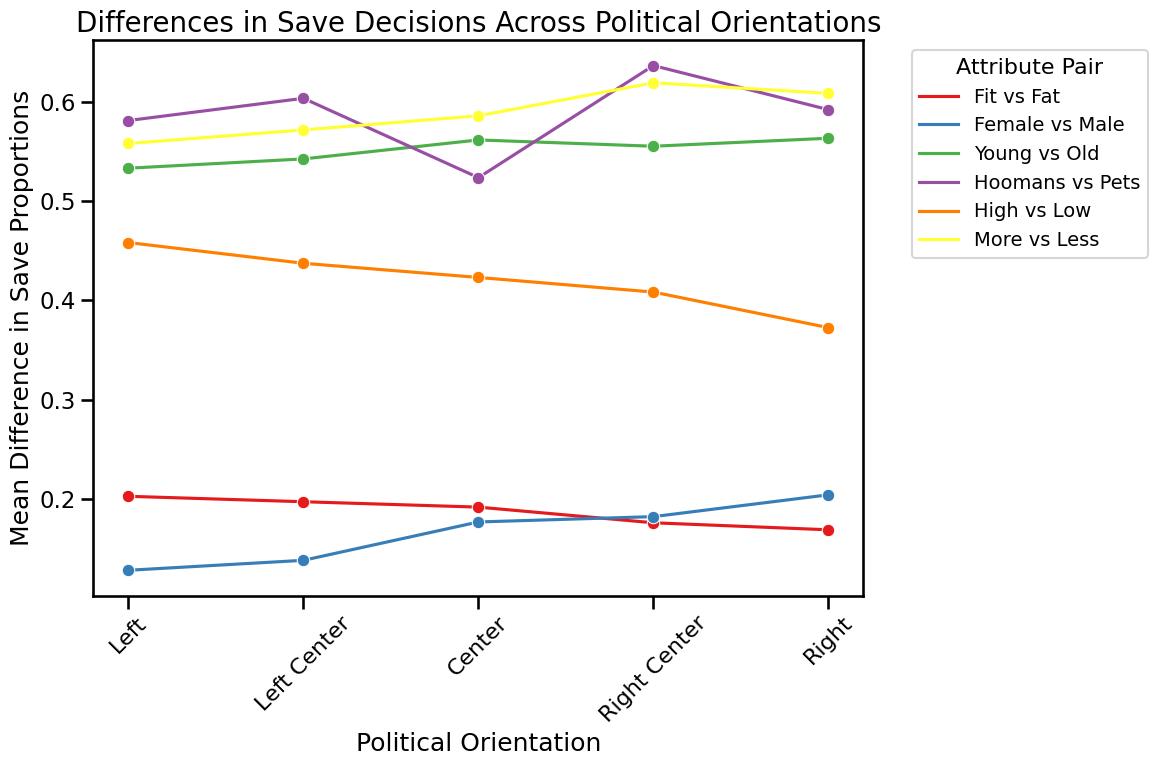

In [5]:

# Adjust figure size here (making it smaller)
plt.figure(figsize=(12, 8))  # Adjusted from (12, 8) to (10, 6) for a smaller figure

# Set larger font scale using Seaborn's set_context
sns.set_context("talk")  # This makes text larger. Other options include "paper", "notebook", "talk", "poster", with "poster" being the largest.

# Define your custom or chosen color palette
custom_palette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

# Plotting with seaborn lineplot
sns.lineplot(data=all_data_df, x='variable', y='value', hue='AttributePair', marker='o', palette='Set1', ci=None)

# Customize plot title and labels with larger font sizes
plt.title('Differences in Save Decisions Across Political Orientations', fontsize=20)
plt.ylabel('Mean Difference in Save Proportions', fontsize=18)
plt.xlabel('Political Orientation', fontsize=18)

# Rotate x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, fontsize=16)

# Adjust legend font size
plt.legend(title='Attribute Pair', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14, title_fontsize='16')

plt.tight_layout()
# plt.show()

plt.savefig('report_graph/proportion_differences_all_pairs.png')

# Reset context if needed for other plots
sns.set_context("notebook")

C:\Users\Ziqi\AppData\Local\Temp\ipykernel_3984\4195189201.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=all_data_df, x='variable', y='value', hue='AttributePair', marker='o', palette=custom_palette, ci=None)
C:\Users\Ziqi\AppData\Local\Temp\ipykernel_3984\4195189201.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=all_data_df, x='variable', y='value', hue='AttributePair', marker='o', palette=custom_palette, ci=None)


<Axes: xlabel='variable', ylabel='value'>

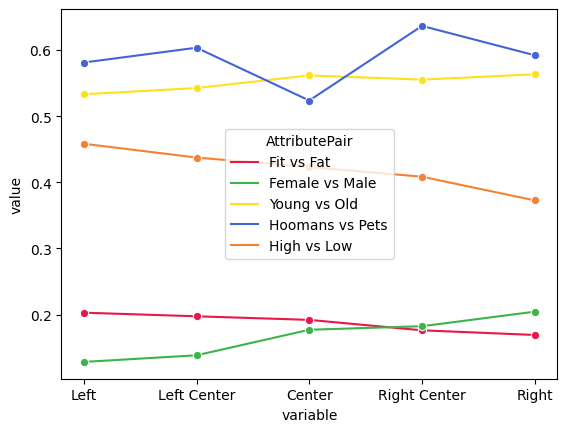

In [4]:
custom_palette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']
sns.lineplot(data=all_data_df, x='variable', y='value', hue='AttributePair', marker='o', palette=custom_palette, ci=None)

The below codes are discarded

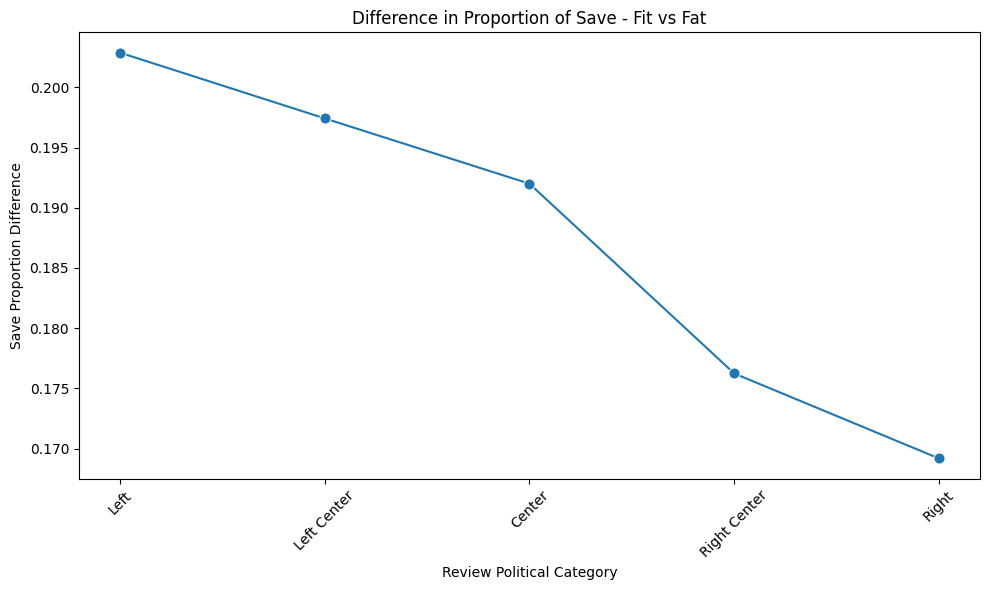

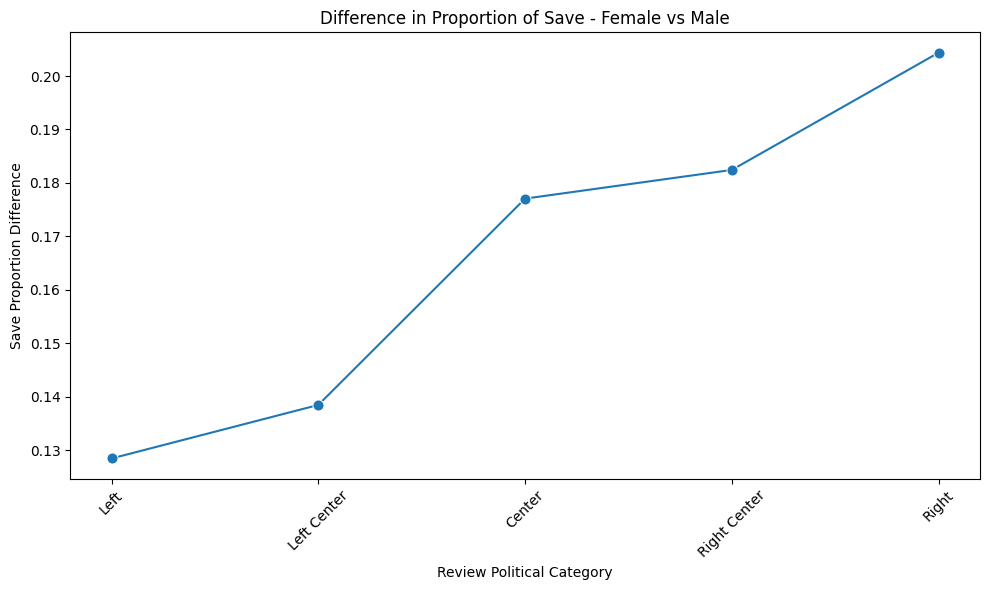

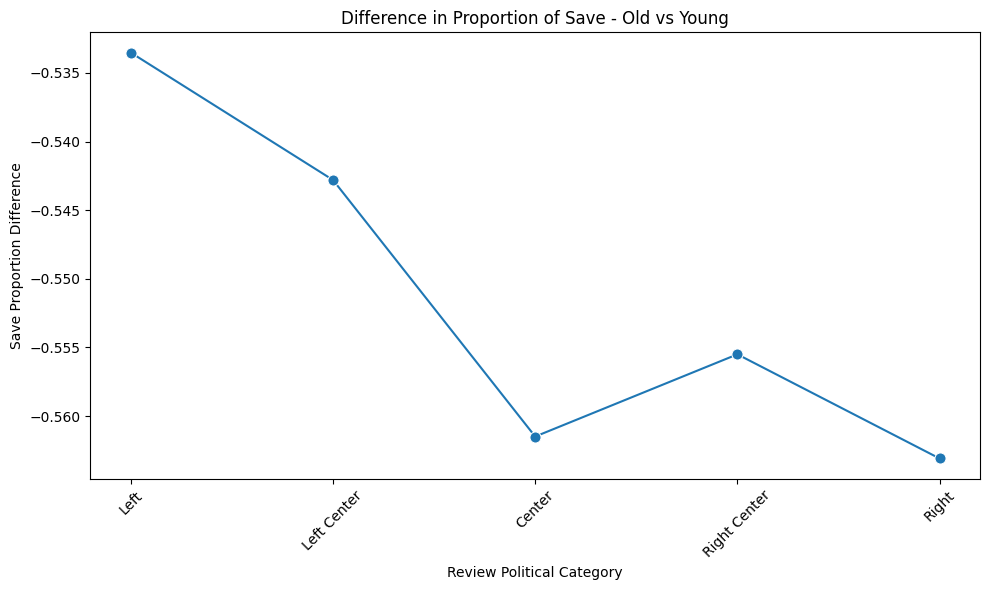

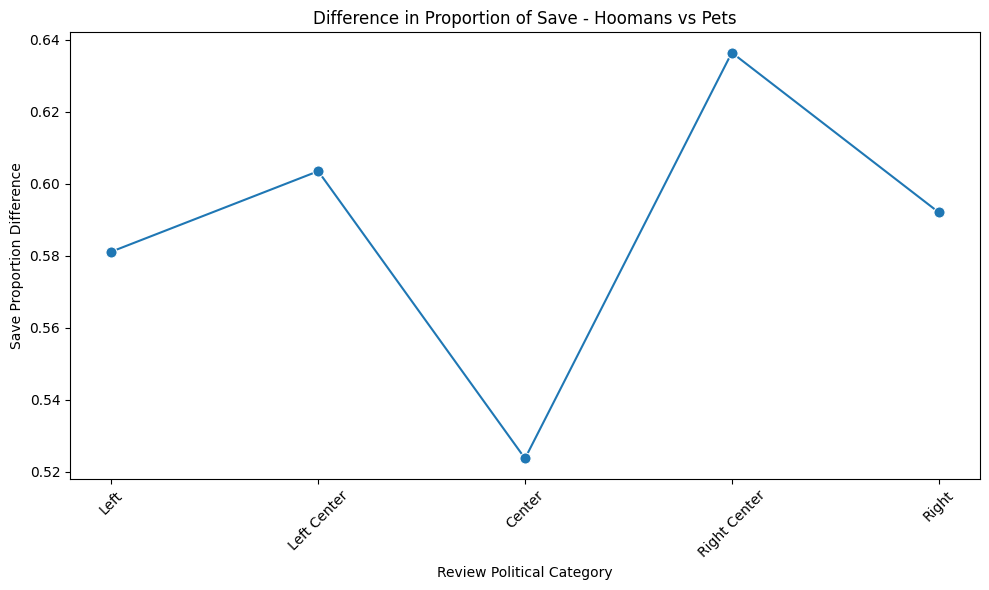

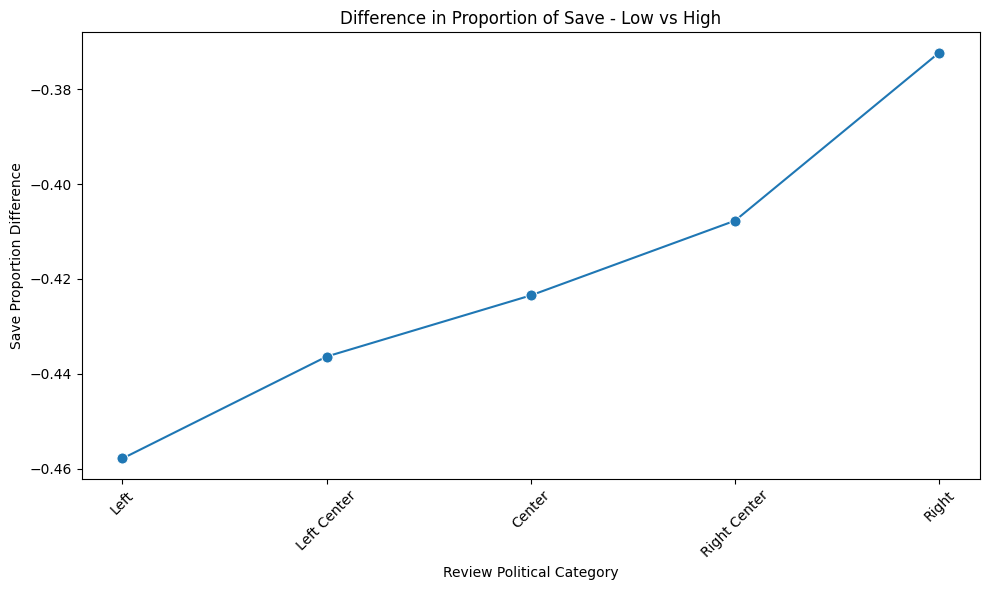


Linear Regression for: Fit vs Fat
                                OLS Regression Results                                
Dep. Variable:     save_proportion_difference   R-squared:                       0.960
Model:                                    OLS   Adj. R-squared:                  0.946
Method:                         Least Squares   F-statistic:                     71.47
Date:                        Thu, 28 Mar 2024   Prob (F-statistic):            0.00347
Time:                                20:08:53   Log-Likelihood:                 22.730
No. Observations:                           5   AIC:                            -41.46
Df Residuals:                               3   BIC:                            -42.24
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975

c:\Users\Ziqi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Ziqi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Ziqi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Ziqi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 sam

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming 'df' is your DataFrame, and it has been appropriately loaded and prepared.
df['is_save'] = df['Saved'] == 1

ordered_political_labels = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

# Define the pairs of attributes you want to compare
attribute_pairs = [
    ('Fit', 'Fat'),
    ('Female', 'Male'),
    ('Old', 'Young'),
    ('Hoomans', 'Pets'),
    ('Low', 'High')
]

# Initialize an empty DataFrame for accumulating results
all_diffs_df = pd.DataFrame()

# Bootstrap parameters
n_bootstraps = 100  # Adjust as necessary for balance between speed and accuracy
np.random.seed(42)  # For reproducibility

# Loop through each pair
for pair in attribute_pairs:
    diffs = []  # List to store the differences in proportions for each bootstrap
    for i in range(n_bootstraps):
        # Sample with replacement
        sampled_df = df.sample(n=len(df), replace=True)
        # Calculate mean proportion of save for each level within the pair
        proportions = sampled_df.groupby(['AttributeLevel', 'Review_political_cat'])['is_save'].mean().reset_index()
        # Calculate differences
        diff = proportions[proportions['AttributeLevel'] == pair[0]].set_index('Review_political_cat')['is_save'] - \
               proportions[proportions['AttributeLevel'] == pair[1]].set_index('Review_political_cat')['is_save']
        diffs.append(diff)

# record the proportion, make a confidence
    
    # Convert list of differences to DataFrame and calculate the mean difference
    diffs_df = pd.DataFrame(diffs).mean().reset_index()
    diffs_df.columns = ['Review_political_cat', 'save_proportion_difference']
    diffs_df['Review_political_cat'] = pd.Categorical(diffs_df['Review_political_cat'], categories=ordered_political_labels, ordered=True)
    diffs_df['AttributePair'] = f'{pair[0]} vs {pair[1]}'
    
    # Append to the accumulator DataFrame
    all_diffs_df = pd.concat([all_diffs_df, diffs_df], ignore_index=True)

    # Plotting the difference in save proportions for the current attribute pair
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Review_political_cat', y='save_proportion_difference', data=diffs_df, marker='o', markersize=8)
    plt.xticks(rotation=45)
    plt.title(f'Difference in Proportion of Save - {pair[0]} vs {pair[1]}')
    plt.ylabel('Save Proportion Difference')
    plt.xlabel('Review Political Category')
    plt.tight_layout()
    plt.savefig(f'propotion_graph/proportion_difference_{pair[0]}_vs_{pair[1]}.png')
    plt.show()

# Save the accumulated DataFrame to a CSV file for later use
all_diffs_df.to_csv('differences_in_save_proportions.csv', index=False)

# Map political categories to numeric values for regression analysis
political_mapping = {label: i for i, label in enumerate(ordered_political_labels, 1)}
all_diffs_df['Review_political_cat_numeric'] = all_diffs_df['Review_political_cat'].map(political_mapping)

# Perform a linear regression for each attribute pair
for attribute_pair in all_diffs_df['AttributePair'].unique():
    print(f"\nLinear Regression for: {attribute_pair}")
    sub_df = all_diffs_df[all_diffs_df['AttributePair'] == attribute_pair]
    X = sub_df[['Review_political_cat_numeric']]  # Predictor
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    Y = sub_df['save_proportion_difference']  # Response

    model = sm.OLS(Y, X).fit()  # Fit model
    print(model.summary())

In [9]:
for attribute_pair in all_diffs_df['AttributePair'].unique():
    print(f"\nLinear Regression for: {attribute_pair}")
    sub_df = all_diffs_df[all_diffs_df['AttributePair'] == attribute_pair]
    X = sub_df[['Review_political_cat_numeric']]  # Predictor
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    Y = sub_df['save_proportion_difference']  # Response

    model = sm.OLS(Y, X).fit()  # Fit model
    print(model.summary())


Linear Regression for: Fit vs Fat
                                OLS Regression Results                                
Dep. Variable:     save_proportion_difference   R-squared:                       0.960
Model:                                    OLS   Adj. R-squared:                  0.946
Method:                         Least Squares   F-statistic:                     71.47
Date:                        Thu, 28 Mar 2024   Prob (F-statistic):            0.00347
Time:                                20:16:00   Log-Likelihood:                 22.730
No. Observations:                           5   AIC:                            -41.46
Df Residuals:                               3   BIC:                            -42.24
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975

c:\Users\Ziqi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Ziqi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Ziqi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Ziqi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 sam

<Figure size 1000x600 with 0 Axes>

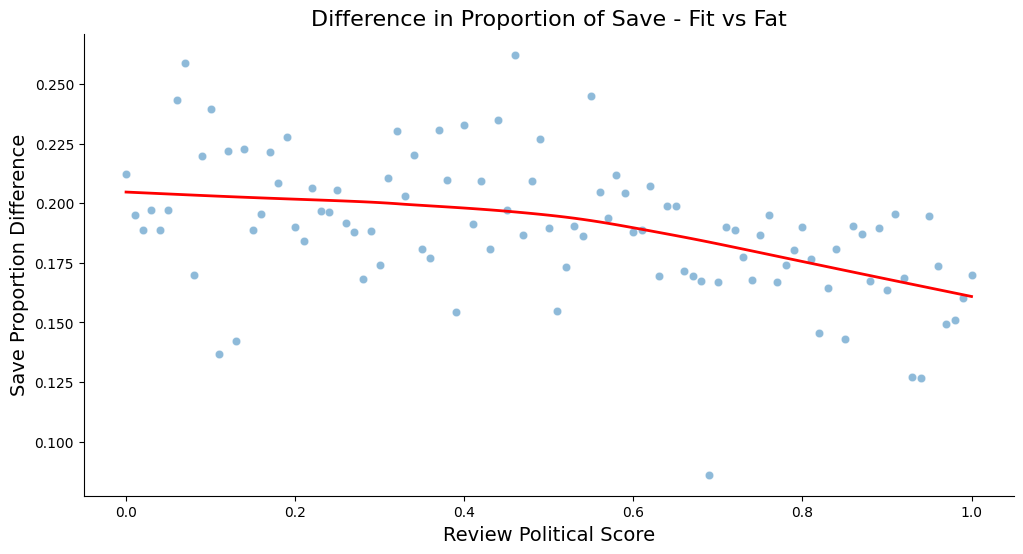

<Figure size 1000x600 with 0 Axes>

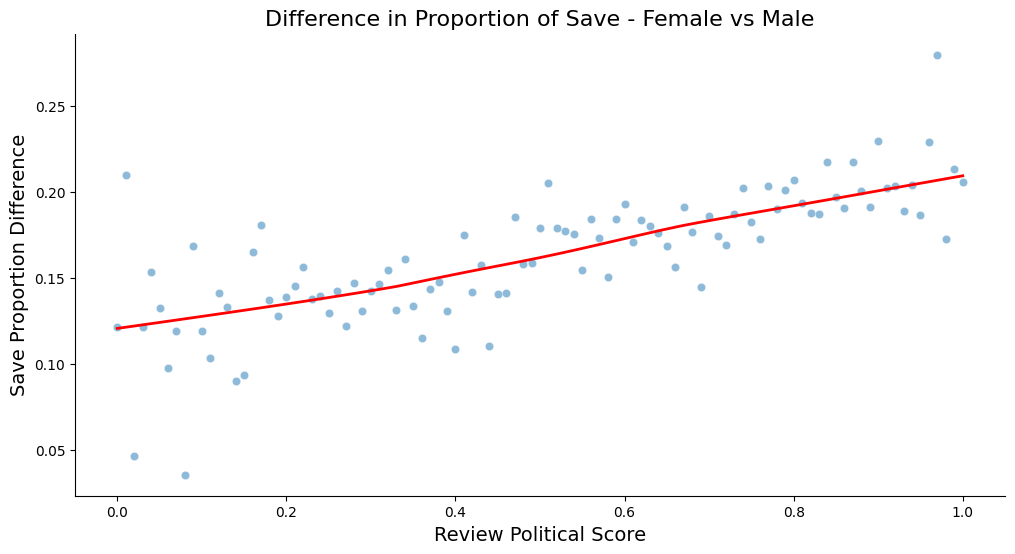

<Figure size 1000x600 with 0 Axes>

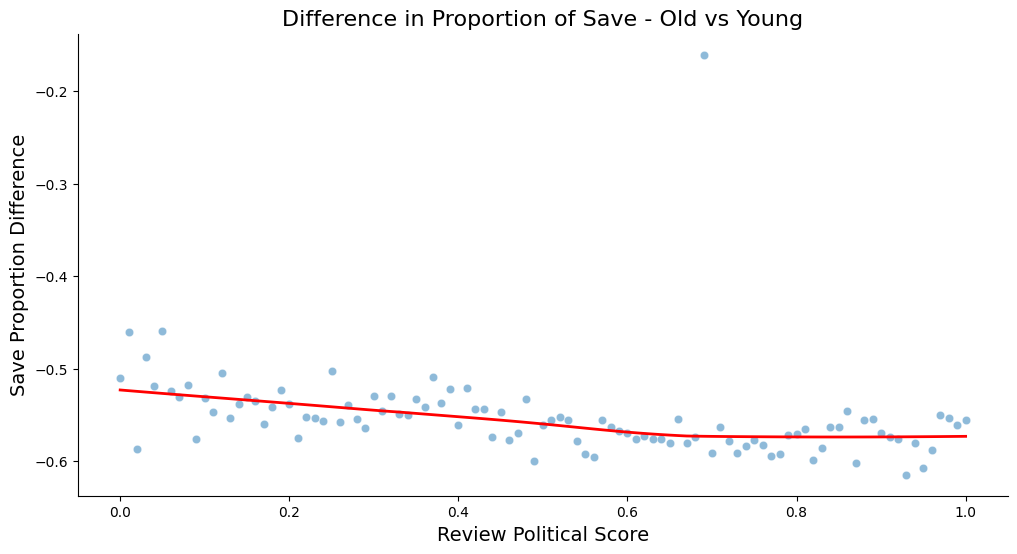

<Figure size 1000x600 with 0 Axes>

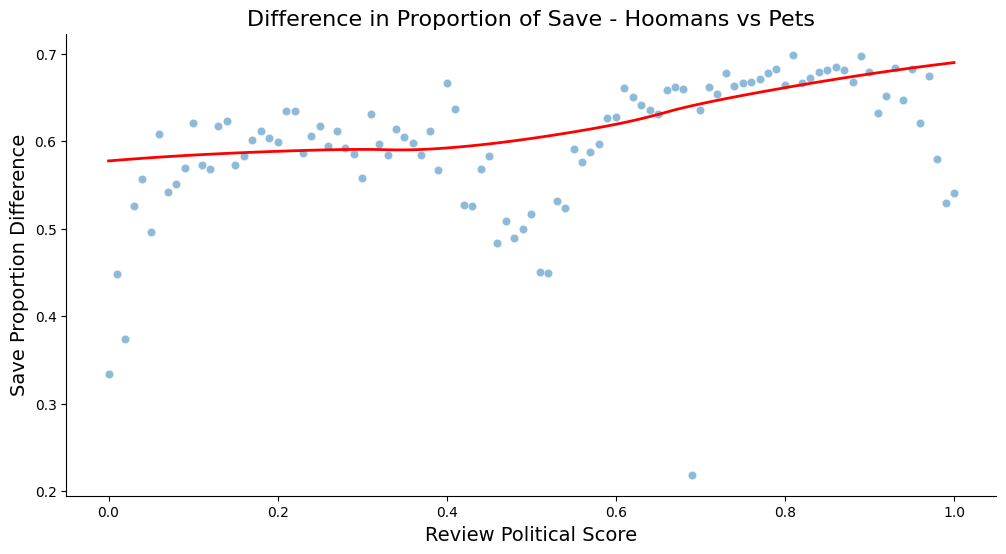

<Figure size 1000x600 with 0 Axes>

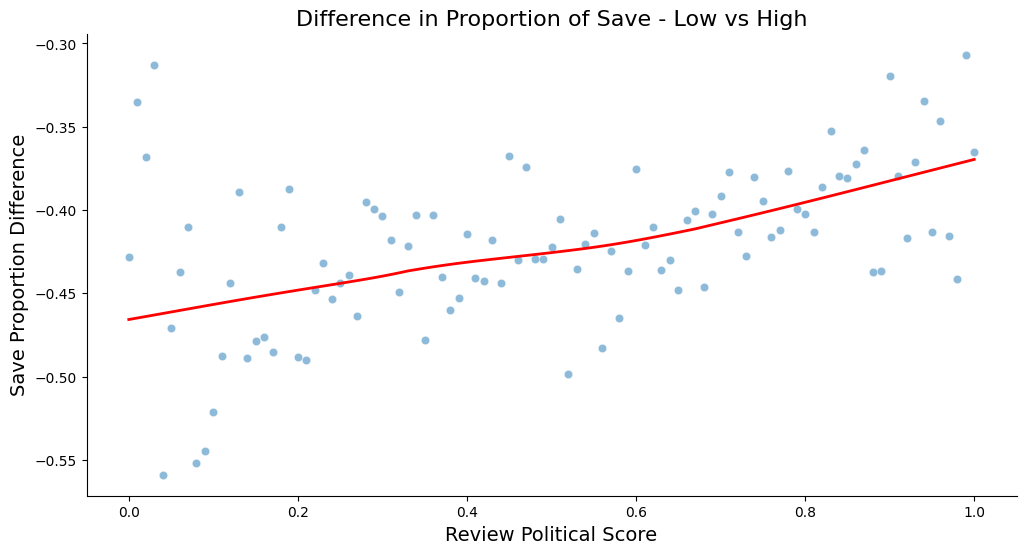


Linear Regression for: Fit vs Fat
                                OLS Regression Results                                
Dep. Variable:     save_proportion_difference   R-squared:                       0.216
Model:                                    OLS   Adj. R-squared:                  0.208
Method:                         Least Squares   F-statistic:                     27.27
Date:                        Thu, 28 Mar 2024   Prob (F-statistic):           9.79e-07
Time:                                20:42:49   Log-Likelihood:                 228.77
No. Observations:                         101   AIC:                            -453.5
Df Residuals:                              99   BIC:                            -448.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
----------

In [11]:
all_diffs_df_cont = pd.DataFrame()

# Bootstrap parameters
n_bootstraps = 100  # Adjust as necessary for balance between speed and accuracy
np.random.seed(42)  # For reproducibility

# Loop through each pair
for pair in attribute_pairs:
    diffs = []  # List to store the differences in proportions for each bootstrap
    for i in range(n_bootstraps):
        # Sample with replacement
        sampled_df = df.sample(n=len(df), replace=True)
        # Calculate mean proportion of save for each level within the pair
        proportions = sampled_df.groupby(['AttributeLevel', 'Review_political'])['is_save'].mean().reset_index()
        # Calculate differences
        diff = proportions[proportions['AttributeLevel'] == pair[0]].set_index('Review_political')['is_save'] - \
               proportions[proportions['AttributeLevel'] == pair[1]].set_index('Review_political')['is_save']
        diffs.append(diff)
    
    # Convert list of differences to DataFrame and calculate the mean difference
    diffs_df = pd.DataFrame(diffs).mean().reset_index()
    diffs_df.columns = ['Review_political', 'save_proportion_difference']
    diffs_df['AttributePair'] = f'{pair[0]} vs {pair[1]}'
    
    # Append to the accumulator DataFrame
    all_diffs_df_cont = pd.concat([all_diffs_df_cont, diffs_df], ignore_index=True)

    # Plotting the difference in save proportions for the current attribute pair
    plt.figure(figsize=(10, 6))

    plt.figure(figsize=(12, 6))

    # Scatter plot of the data points with some transparency
    sns.scatterplot(x='Review_political', y='save_proportion_difference', data=diffs_df, alpha=0.5)

    # Lowess smoother for trend line
    sns.regplot(x='Review_political', y='save_proportion_difference', data=diffs_df, lowess=True, 
                line_kws={'color': 'red', 'lw': 2}, scatter=False)

    plt.title(f'Difference in Proportion of Save - {pair[0]} vs {pair[1]}', fontsize=16)
    plt.xlabel('Review Political Score', fontsize=14)
    plt.ylabel('Save Proportion Difference', fontsize=14)

    # Remove the top and right spines
    sns.despine()

    plt.savefig(f'proportion_difference_cont_{pair[0]}_vs_{pair[1]}.png')
    plt.show()

# Save the accumulated DataFrame to a CSV file for later use
all_diffs_df_cont.to_csv('differences_in_save_proportions_continuous.csv', index=False)

# Perform a linear regression for each attribute pair
for attribute_pair in all_diffs_df_cont['AttributePair'].unique():
    print(f"\nLinear Regression for: {attribute_pair}")
    sub_df = all_diffs_df_cont[all_diffs_df_cont['AttributePair'] == attribute_pair]
    X = sub_df[['Review_political']]  # Predictor
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    Y = sub_df['save_proportion_difference']  # Response

    model = sm.OLS(Y, X).fit()  # Fit model
    print(model.summary())

Bootstrap 0
Bootstrap 10
Bootstrap 20
Bootstrap 30
Bootstrap 40
Bootstrap 50
Bootstrap 60
Bootstrap 70
Bootstrap 80
Bootstrap 90


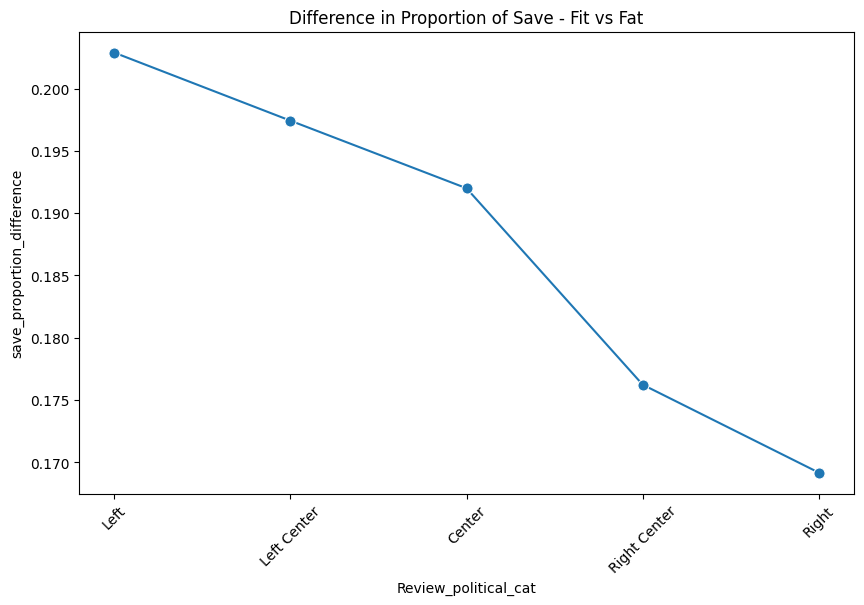

Bootstrap 0
Bootstrap 10
Bootstrap 20
Bootstrap 30
Bootstrap 40
Bootstrap 50
Bootstrap 60
Bootstrap 70
Bootstrap 80
Bootstrap 90


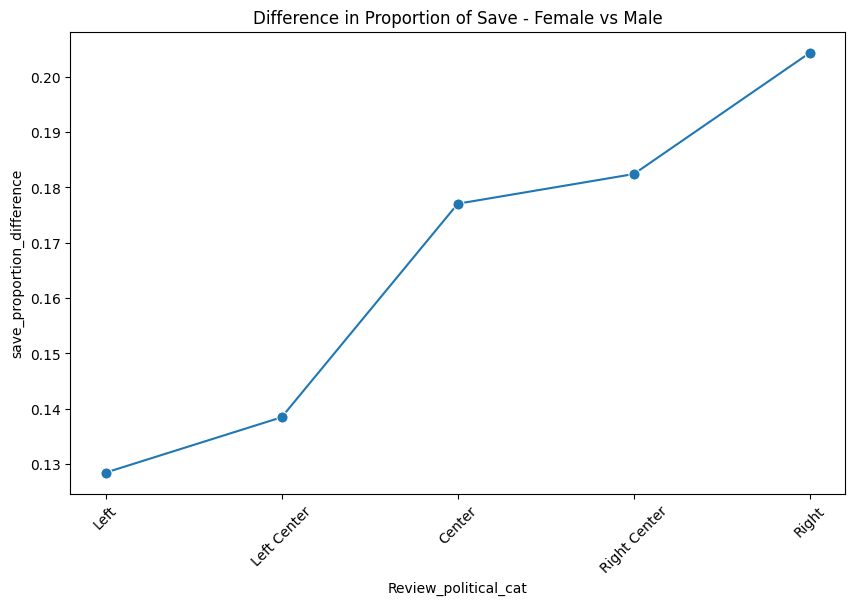

Bootstrap 0
Bootstrap 10
Bootstrap 20


KeyboardInterrupt: 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has been appropriately loaded and prepared.

df['is_save'] = df['Saved'] == 1

ordered_political_labels = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

# Define the pairs of attributes you want to compare
attribute_pairs = [
    ('Fit', 'Fat'),
    ('Female', 'Male'),
    ('Old', 'Young'),
    ('Hoomans', 'Pets'),
    ('Low', 'High')
]

# Bootstrap parameters
n_bootstraps = 100
np.random.seed(42)  # For reproducibility

# Loop through each pair
for pair in attribute_pairs:
    diffs = []  # List to store the differences in proportions for each bootstrap
    for i in range(n_bootstraps):
        if i % 10 == 0:
            print(f'Bootstrap {i}')
        # Sample with replacement
        sampled_df = df.sample(n=len(df), replace=True)
        # Calculate mean proportion of save for each level within the pair
        proportions = sampled_df.groupby(['AttributeLevel', 'Review_political_cat'])['is_save'].mean().reset_index()
        # Calculate differences
        diff = proportions[proportions['AttributeLevel'] == pair[0]].set_index('Review_political_cat')['is_save'] - \
               proportions[proportions['AttributeLevel'] == pair[1]].set_index('Review_political_cat')['is_save']
        diffs.append(diff)
    
    # Convert list of differences to DataFrame
    diffs_df = pd.DataFrame(diffs).mean().reset_index()
    diffs_df.columns = ['Review_political_cat', 'save_proportion_difference']
    diffs_df['Review_political_cat'] = pd.Categorical(diffs_df['Review_political_cat'], categories=ordered_political_labels, ordered=True)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Review_political_cat', y='save_proportion_difference', data=diffs_df, 
                 marker='o', markersize=8)
    plt.xticks(rotation=45)
    plt.title(f'Difference in Proportion of Save - {pair[0]} vs {pair[1]}')
    # plt.savefig(f'proportion_difference_graph/Difference in Proportion of Save - {pair[0]} vs {pair[1]}.png')
    plt.show()

difference
bootsrap, do testing

In [7]:
df['is_save'] = df['Saved'] == 1

# Group the data by 'attribute difference' and 'political label' and calculate the proportion of 'save'
result = df.groupby(['AttributeLevel', 'Review_political_cat'])['is_save'].mean().reset_index(name='save_proportion')

# Sort the results for better readability (optional)
result = result.sort_values(by=['AttributeLevel', 'Review_political_cat'])

print(result)

   AttributeLevel Review_political_cat  save_proportion
0             Fat                 Left         0.399461
1             Fat          Left Center         0.402507
2             Fat               Center         0.403772
3             Fat         Right Center         0.411565
4             Fat                Right         0.414310
5          Female                 Left         0.564626
6          Female          Left Center         0.569916
7          Female               Center         0.588590
8          Female         Right Center         0.590832
9          Female                Right         0.602612
10            Fit                 Left         0.602577
11            Fit          Left Center         0.600471
12            Fit               Center         0.595686
13            Fit         Right Center         0.587336
14            Fit                Right         0.583556
15           High                 Left         0.760432
16           High          Left Center         0

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

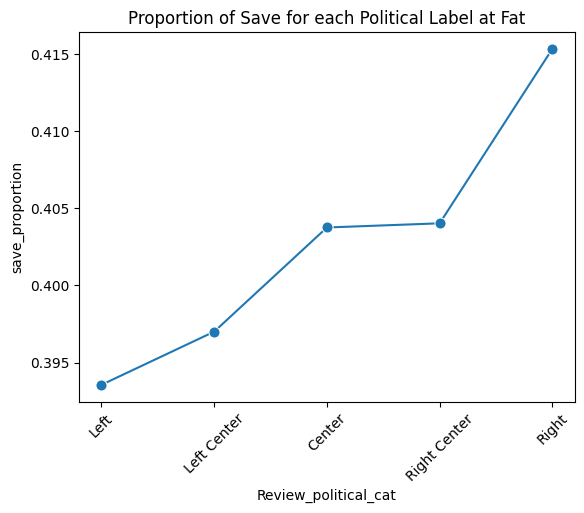

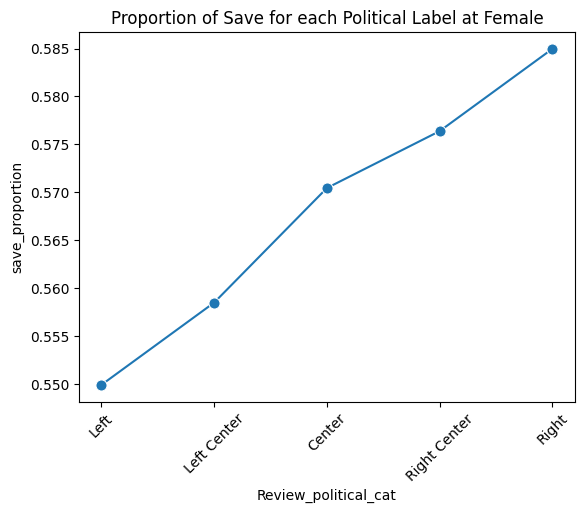

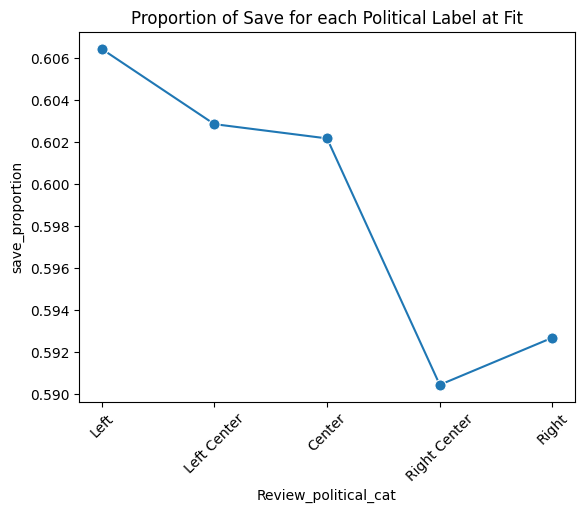

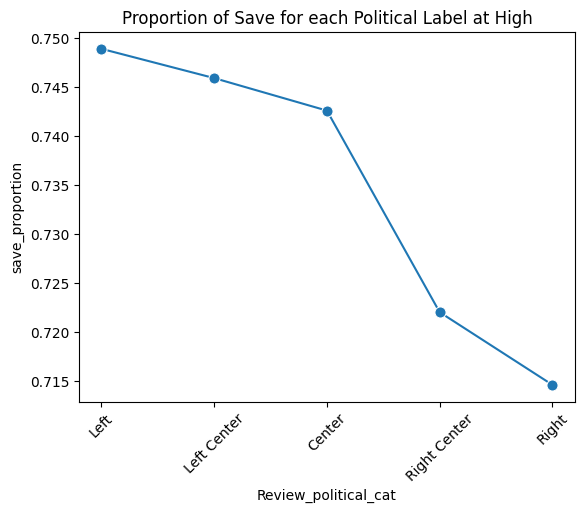

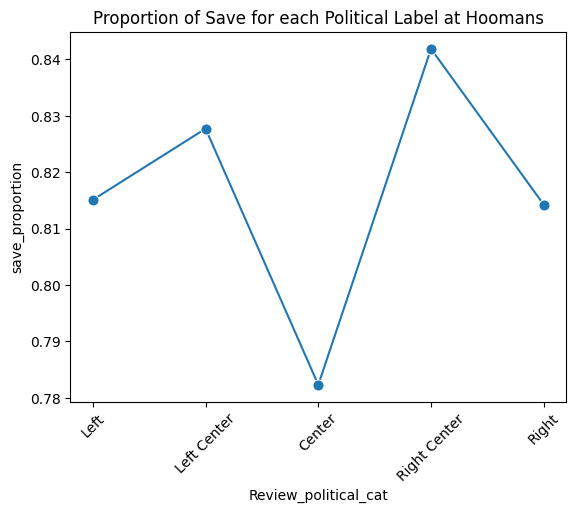

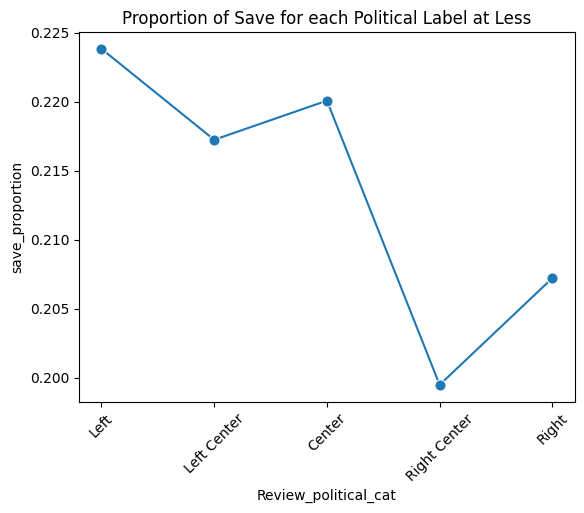

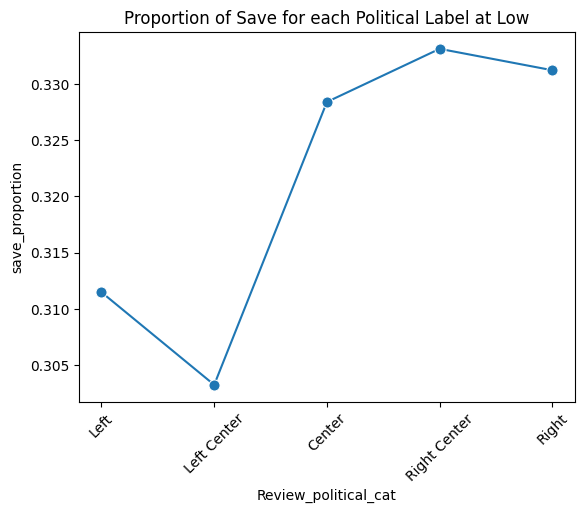

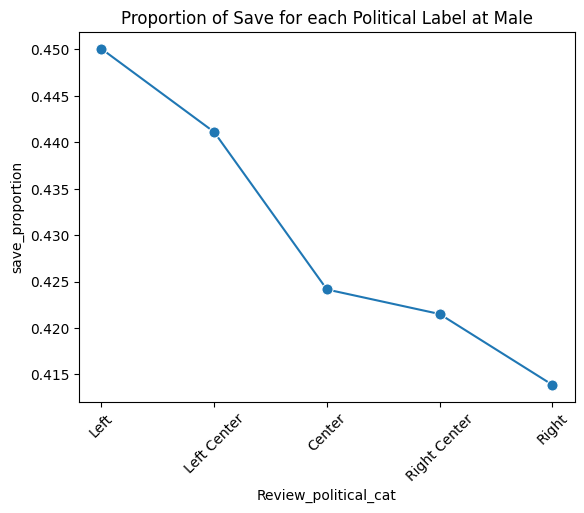

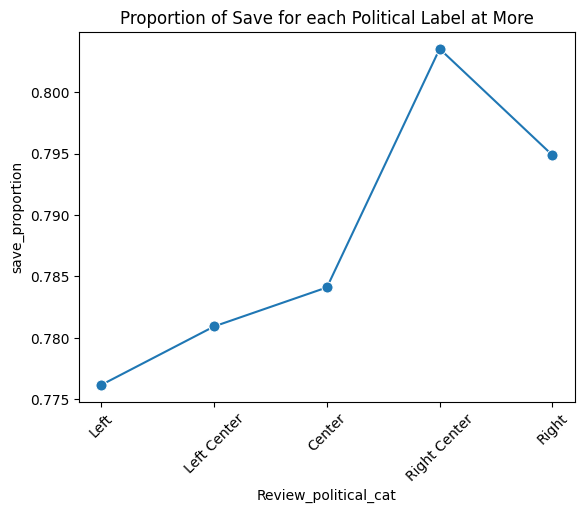

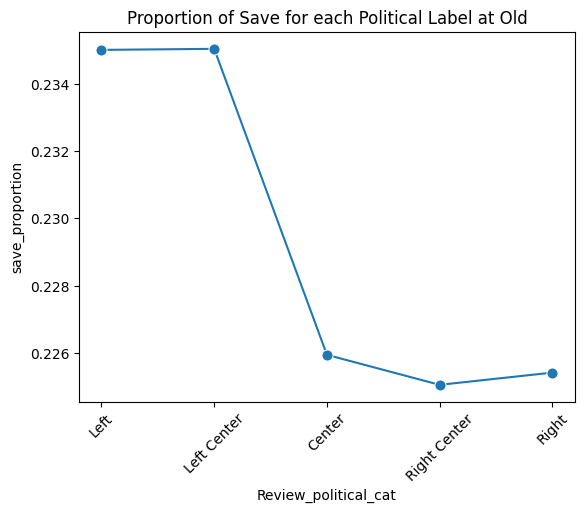

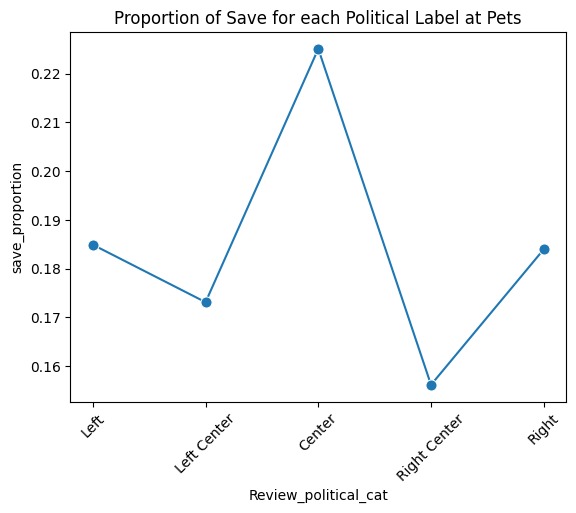

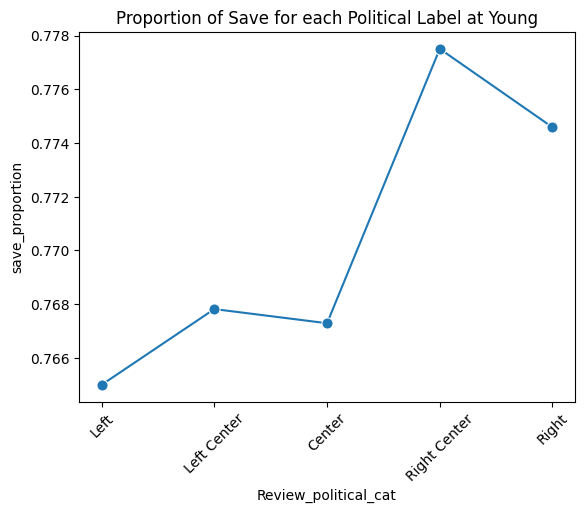

In [8]:
# for each attribute leve, plot a bar chart to show the proportion of 'save' for each political label with order
ordered_political_labels = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

result['Review_political_cat'] = pd.Categorical(result['Review_political_cat'], categories=ordered_political_labels, ordered=True)

for attribute_level in result['AttributeLevel'].unique():
    sub_df = result[result['AttributeLevel'] == attribute_level].sort_values('Review_political_cat')
    plt.figure()
    sns.lineplot(x='Review_political_cat', y='save_proportion', data=sub_df, 
                 marker='o',  # Add markers for each point
                 markersize=8,  # Adjust the size of the markers if needed
                 )
    plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
    plt.title(f'Proportion of Save for each Political Label at {attribute_level}')
    plt.show()

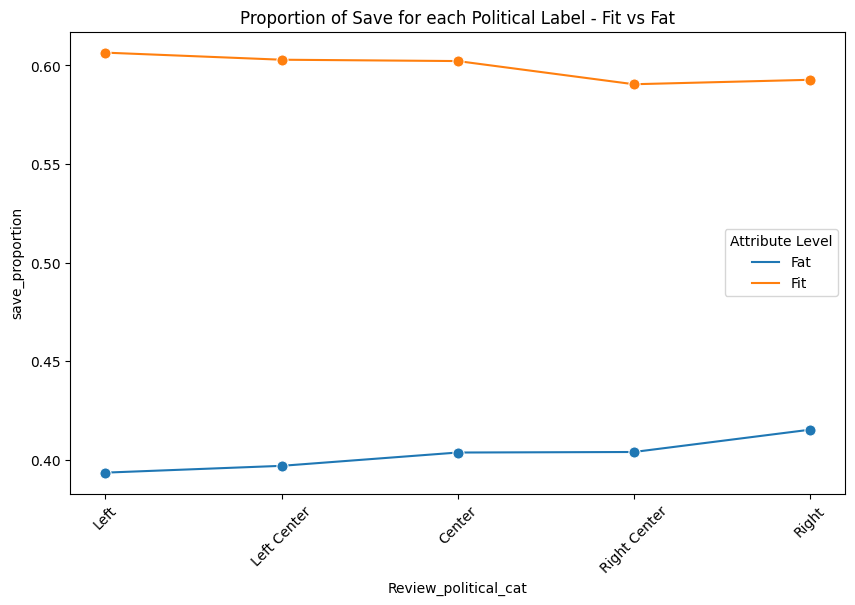

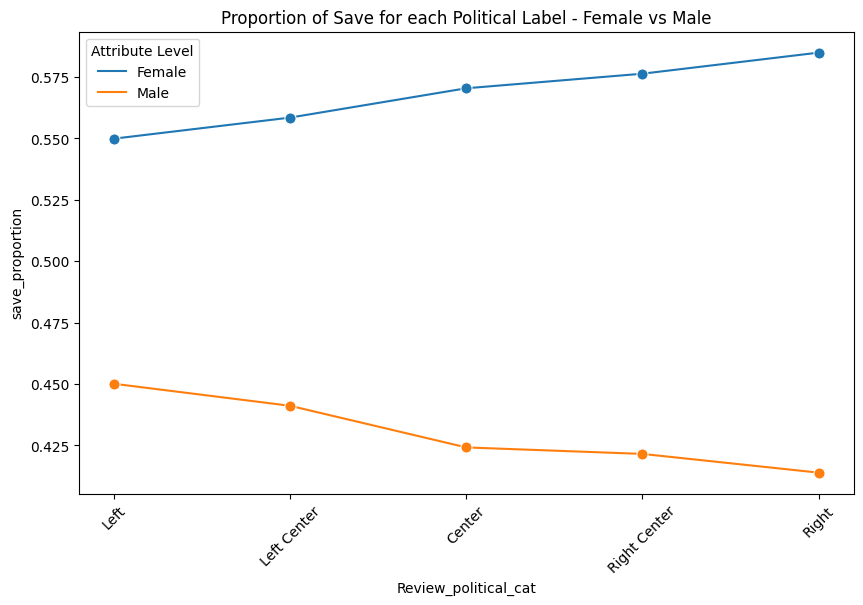

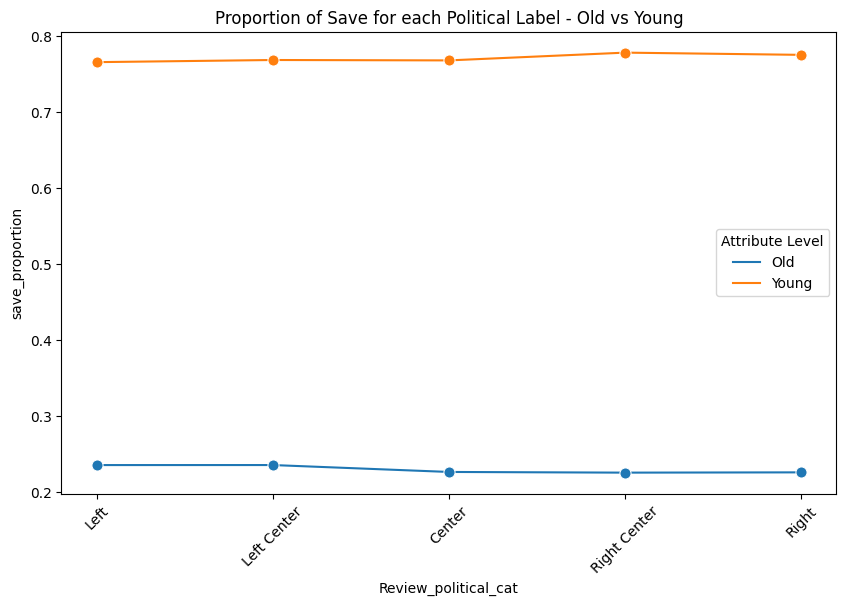

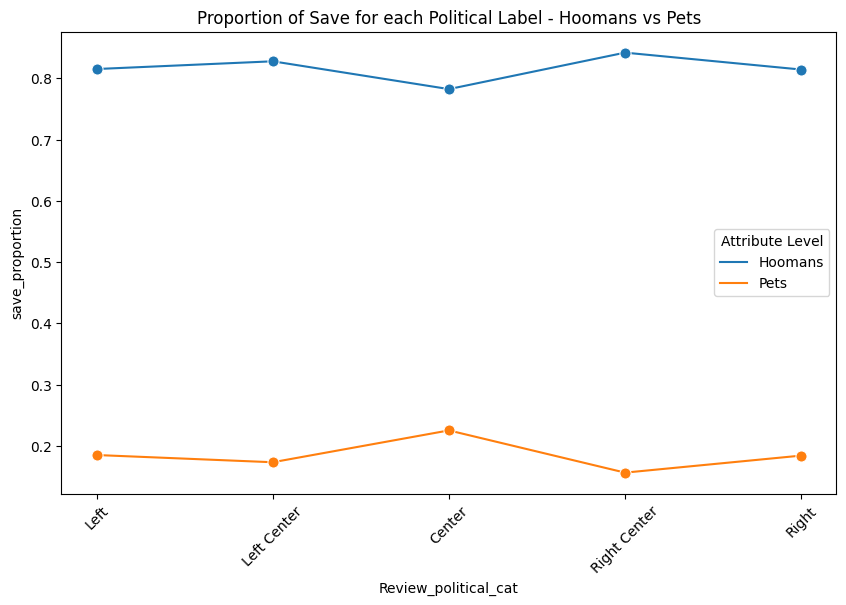

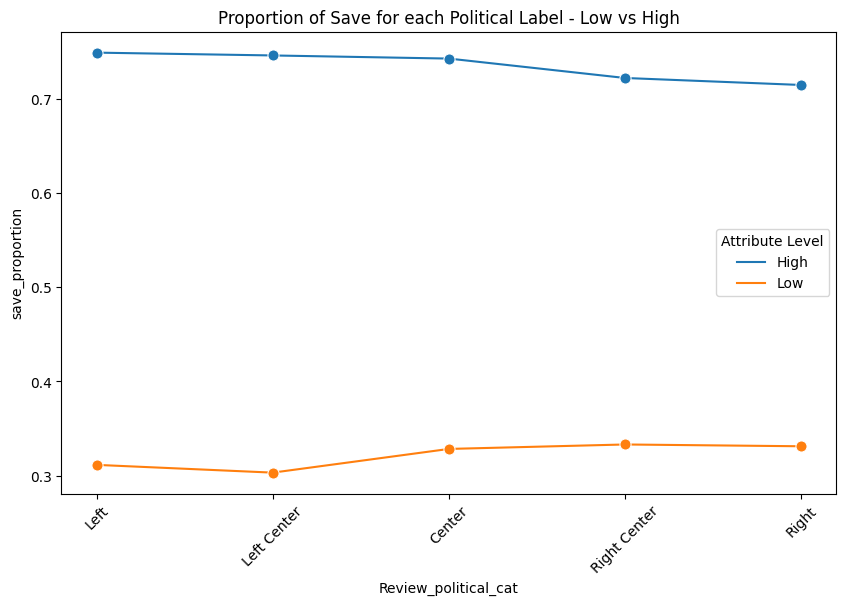

In [12]:
ordered_political_labels = ['Left', 'Left Center', 'Center', 'Right Center', 'Right']

# Set the order for the 'Review_political_cat' as a categorical variable
result['Review_political_cat'] = pd.Categorical(result['Review_political_cat'], categories=ordered_political_labels, ordered=True)

# Define the pairs of attributes you want to compare
attribute_pairs = [
    ('Fit', 'Fat'),
    ('Female', 'Male'),
    ('Old', 'Young'),
    ('Hoomans', 'Pets'),
    ('Low', 'High')
]

# Loop through each pair and plot
for pair in attribute_pairs:
    # Filter the DataFrame for the current pair of attributes
    sub_df = result[result['AttributeLevel'].isin(pair)].sort_values(['Review_political_cat', 'AttributeLevel'])
    
    plt.figure(figsize=(10, 6))  # Set figure size for better visibility
    sns.lineplot(x='Review_political_cat', y='save_proportion', hue='AttributeLevel', data=sub_df, 
                 marker='o',  # Add markers for each point
                 markersize=8,  # Adjust the size of the markers if needed
                 )
    plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
    plt.title(f'Proportion of Save for each Political Label - {pair[0]} vs {pair[1]}')
    plt.legend(title='Attribute Level')
    plt.savefig(f'propotion_graph/Proportion of Save for each Political Label - {pair[0]} vs {pair[1]}.png')
    plt.show()